In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as im
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import seaborn as sns #For visualization purpose
from sklearn.metrics import classification_report,confusion_matrix #For model evaluation metrics
from sklearn.model_selection import train_test_split # For Spliting data to training and testing data
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [23]:
data = pd.read_csv('breast_cancer/wdbc.data',delimiter = ',',header=None)

# Drop column related to patient ID
data.drop(data.columns[0], axis=1, inplace=True)

# Select target column and saving it
targets = data.iloc[:, 0]
targets = targets.map({'M': 0, 'B': 1})

# Drop target column from training set
data.drop(data.columns[0], axis=1, inplace=True)

# Split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(data,targets,test_size=0.25,random_state=101)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Check correct dimensions of data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(426, 30)
(143, 30)
(426,)
(143,)


In [24]:
# Build neural network architecture
model = Sequential()
model.add(Input(shape=(data.shape[1],)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

optim = tf.keras.optimizers.Adam()
es = EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer=optim, loss='binary_crossentropy',metrics=['accuracy'])

# Set fixed seed for reproducibility
np.random.seed(1)

In [25]:
# Train the model
history = model.fit(X_train,y_train, validation_split=0.2, epochs=500, batch_size=10, callbacks=[es])

# Print summary data
model.summary()

# Get the outputs corresponding to all the data
outputs = model.predict(data)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3586 - loss: 0.7716 - val_accuracy: 0.3953 - val_loss: 0.6635
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5375 - loss: 0.6484 - val_accuracy: 0.9884 - val_loss: 0.5799
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.5730 - val_accuracy: 0.9535 - val_loss: 0.5121
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9498 - loss: 0.5030 - val_accuracy: 0.9535 - val_loss: 0.4557
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9436 - loss: 0.4504 - val_accuracy: 0.9535 - val_loss: 0.4076
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9434 - loss: 0.4096 - val_accuracy: 0.9535 - val_loss: 0.3667
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9425 - loss: 0.3659 - val_accuracy: 0.9651 - val_loss: 0.3321
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9544 - loss: 0.3387 - val_accuracy: 0.9651 - v

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,284 (5.02 KB)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [29]:
validation_stop_epoch = np.array(history.history['val_loss']).argmin()
print('Stop epoch: %d' % validation_stop_epoch)
print('Expected RMS error: %.2E' % history.history['val_loss'][validation_stop_epoch])

Stop epoch: 204
Expected RMS error: 3.65E-02


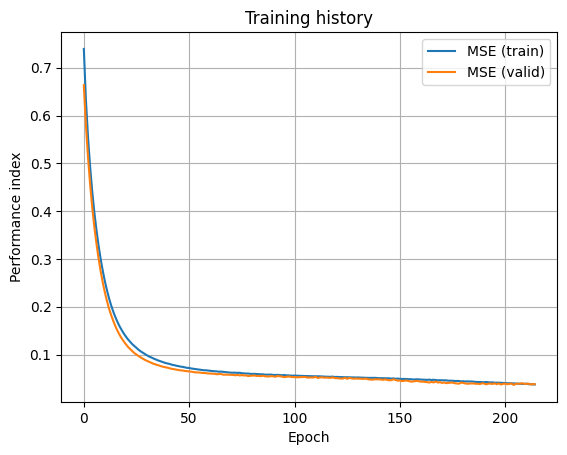

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training history')
plt.ylabel('Performance index')
plt.xlabel('Epoch')
plt.legend(['MSE (train)', 'MSE (valid)'], loc='upper right')
plt.grid()
plt.show()

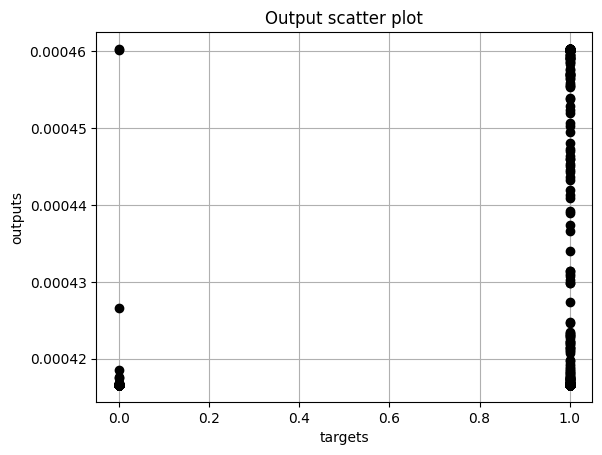

In [28]:
# Plot target-output relationship (ideal: targets == outputs, straight line)
plt.plot(targets,outputs,'ok')
plt.title('Output scatter plot')
plt.xlabel('targets')
plt.ylabel('outputs')
plt.grid()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.0576 
Train score: [0.03829452395439148, 0.9906103014945984]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.0761 
Test score: [0.07164447009563446, 0.9790209531784058]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


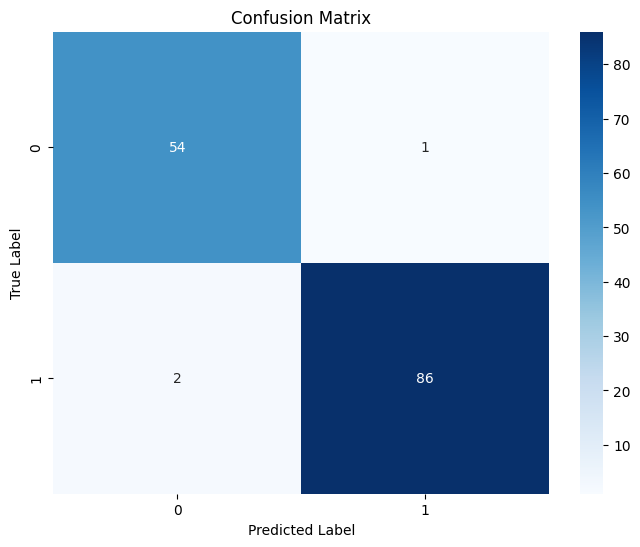

In [32]:
print("Train score:", model.evaluate(X_train, y_train)) # Evaluate returns loss and accuracy on train set
print("Test score:", model.evaluate(X_test, y_test)) # Evaluate returns loss and accuracy on test set

# Predict the target values for the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()